In [49]:
# Add edges to the graph
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
import re


# Function to get the country of a city
def get_country(city):
    try:
        location = geolocator.geocode(city)
        return location.address.split(',')[-1].strip() if location else None
    except:
        return None

# Initialize the geolocator
geolocator = Nominatim(user_agent="geo_filter")


#Read data
df = pd.read_csv('Extracted_city_data.csv')
print(df)

      Article_ID      News_source Date_published Country  \
0              1     de telegraaf     19/04/2023      NL   
1              2     de telegraaf     20/04/2023      NL   
2              3     de telegraaf     21/04/2023      NL   
3              4  nrc handelsblad     22/04/2023      NL   
4              5     de telegraaf     23/04/2023      NL   
...          ...              ...            ...     ...   
5356        5357       italiaoggi     28/12/2016      IT   
5357        5358       italiaoggi     06/03/2009      IT   
5358        5359       italiaoggi     22/01/2014      IT   
5359        5360       italiaoggi     15/08/2018      IT   
5360        5361        la stampa     07/07/2016      IT   

                                       Cities_mentioned  
0                                           ['Utrecht']  
1                                           ['Utrecht']  
2                   ['Paris', 'Barcelona', 'Rotterdam']  
3     ['Amsterdam', 'Tokyo', 'Seoul', 'Houston'

In [50]:
countries=['Netherlands','United Kingdom','Spain','France','Germany','Italy']
query_codes=['NL','UK','ES','FR','DE','IT']
query='UK'

In [51]:
if query=='EU':
    condition = df['Country'] in query_codes
else:
    condition = df['Country'] == query

# Find the row indices
row_indices = df.index[condition].tolist()
pattern = r"'(.*?)'"
all_cities=[]
city_groups=[]

for i in row_indices:
    text=df['Cities_mentioned'][i]
    city_list = re.findall(pattern, text)
    city_groups.append(city_list)
    #print(city_list)
    if len(city_list)>0:
        for city in city_list:
            if city not in all_cities:
                all_cities.append(city)
                #print(city)




In [43]:
#import multiprocessing as mp
#p = mp.Pool(processes=mp.cpu_count())

In [ ]:
#sample_countries=mp.map(get_country,all_cities)
if query=='EU':
    valid_cities=[city for city in all_cities if get_country(city) in countries]
else:

    valid_cities = [city for city in all_cities if get_country(city) == countries[query_codes.index(query)]]
print(valid_cities)

In [46]:
filtered_city_groups=[]
for group in city_groups:
    filtered_group=[city for city in group if city in valid_cities]
    if len(filtered_group)>1:
        filtered_city_groups.append(filtered_group)
print(filtered_city_groups)

[['Ripon', 'Harrogate', 'Blackpool', 'London'], ['Manchester', 'Glasgow'], ['Hereford', 'Cambridge'], ['Norfolk', 'London', 'Cambridge'], ['Guildford', 'London'], ['Manchester', 'Bristol', 'Edinburgh'], ['Manchester', 'London'], ['Manchester', 'London'], ['London', 'Oxford'], ['Belfast', 'Essex', 'Canterbury', 'Derby', 'London', 'Sandown'], ['Milton Keynes', 'Leicester', 'Loughborough', 'London', 'Birmingham'], ['Newcastle', 'London'], ['Manchester', 'London', 'Birmingham'], ['Brighton', 'London'], ['Stirling', 'Belfast', 'Edinburgh', 'Liverpool', 'London'], ['Dover', 'Belfast', 'Liverpool', 'Hull', 'Plymouth', 'Cornwall'], ['Glasgow', 'Edinburgh'], ['Glasgow', 'Edinburgh'], ['Shrewsbury', 'Hereford'], ['London', 'Dudley', 'Birmingham'], ['Manchester', 'Glasgow'], ['Sheffield', 'London', 'Doncaster'], ['Sheffield', 'London', 'Doncaster'], ['Liverpool', 'Inverness', 'London'], ['Liverpool', 'Cambridge', 'London'], ['Liverpool', 'Cambridge', 'London'], ['Liverpool', 'Cambridge', 'London'

In [47]:
from collections import defaultdict
edge_weights = defaultdict(int)

# Count the occurrences of each pair of cities in the same group
for group in filtered_city_groups:
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            edge_weights[(group[i], group[j])] += 1
            edge_weights[(group[j], group[i])] += 1  # Since the graph is undirected
print(edge_weights)
# Create a graph and add weighted edges
G = nx.Graph()
#nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <30]
#G.remove_nodes_from(nodes_to_remove)
for (city1, city2), weight in edge_weights.items():
    G.add_edge(city1, city2, weight=weight)

# Remove nodes with degree 1
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <25]
G.remove_nodes_from(nodes_to_remove)

strong_link=max(dict(G.edges).items(), key=lambda x: x[1]['weight'])
link_scale= strong_link[1]['weight']
print(nodes_to_remove)

defaultdict(<class 'int'>, {('Ripon', 'Harrogate'): 1, ('Harrogate', 'Ripon'): 1, ('Ripon', 'Blackpool'): 1, ('Blackpool', 'Ripon'): 1, ('Ripon', 'London'): 1, ('London', 'Ripon'): 1, ('Harrogate', 'Blackpool'): 1, ('Blackpool', 'Harrogate'): 1, ('Harrogate', 'London'): 3, ('London', 'Harrogate'): 3, ('Blackpool', 'London'): 1, ('London', 'Blackpool'): 1, ('Manchester', 'Glasgow'): 7, ('Glasgow', 'Manchester'): 7, ('Hereford', 'Cambridge'): 1, ('Cambridge', 'Hereford'): 1, ('Norfolk', 'London'): 9, ('London', 'Norfolk'): 9, ('Norfolk', 'Cambridge'): 2, ('Cambridge', 'Norfolk'): 2, ('London', 'Cambridge'): 25, ('Cambridge', 'London'): 25, ('Guildford', 'London'): 1, ('London', 'Guildford'): 1, ('Manchester', 'Bristol'): 2, ('Bristol', 'Manchester'): 2, ('Manchester', 'Edinburgh'): 8, ('Edinburgh', 'Manchester'): 8, ('Bristol', 'Edinburgh'): 1, ('Edinburgh', 'Bristol'): 1, ('Manchester', 'London'): 25, ('London', 'Manchester'): 25, ('London', 'Oxford'): 5, ('Oxford', 'London'): 5, ('Belf

<ipython-input-48-c23b7942260c>:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


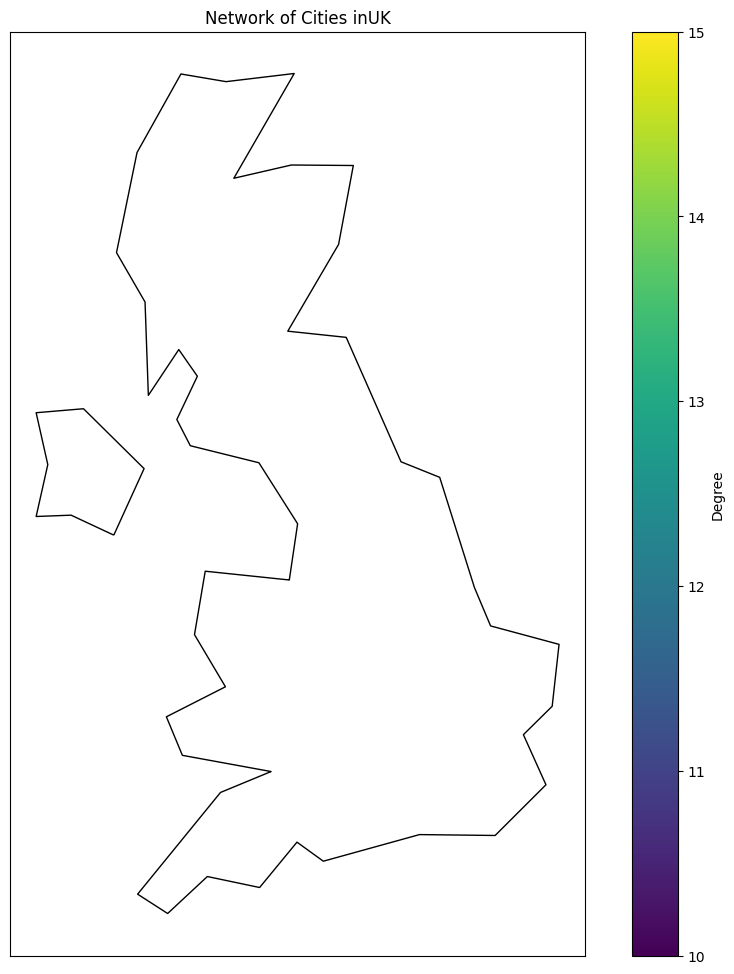

In [48]:
#!conda install geopandas

import geopandas as gpd

def get_lat_lon(city):
    try:
        location = geolocator.geocode(city)
        return (location.latitude, location.longitude) if location else (None, None)
    except:
        return (None, None)


# Get coordinates for each city
valid_cities_1 = [city for city in valid_cities if city not in nodes_to_remove]
city_coords = {city: get_lat_lon(city) for city in valid_cities_1}




# Load the map of the UK using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

if query=='EU':
    map = world[(world.continent == 'Europe') & (world.name != 'Russia')]
else:
    map = world[world.name == countries[query_codes.index(query)]]
# Draw the map
fig, ax = plt.subplots(figsize=(12, 12))
map.plot(ax=ax, color='white', edgecolor='black')

# Create a color map based on the degrees
degrees = dict(G.degree())
max_degree = max(degrees.values())
min_degree = min(degrees.values())
norm = plt.Normalize(vmin=min_degree, vmax=max_degree)
cmap = plt.cm.viridis

# Draw the cities on the map
for city, (lat, lon) in city_coords.items():
    if lat is not None and lon is not None:
        degree = degrees.get(city, 0)
        color = cmap(norm(degree))
        plt.plot(lon, lat, marker='o', color=color, markersize=15)
        plt.text(lon, lat, city, fontsize=10, ha='right')

# Draw the edges on the map
for edge in G.edges(data=True):
    city1, city2, data = edge
    lat1, lon1 = city_coords[city1]
    lat2, lon2 = city_coords[city2]
    weight = data['weight']
    plt.plot([lon1, lon2], [lat1, lat2], 'k-', alpha=weight*0.4/link_scale, linewidth=2)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Degree')
plt.xticks([])
plt.yticks([])
if query=='EU':
    plt.title('Network of Cities in NL,UK,FR,DE,IT,ES')
else:
    plt.title('Network of Cities in'+query)
plt.show()

['Ripon', 'Harrogate', 'Blackpool', 'Glasgow', 'Hereford', 'Guildford', 'Bristol', 'Oxford', 'Essex', 'Canterbury', 'Derby', 'Sandown', 'Milton Keynes', 'Leicester', 'Loughborough', 'Brighton', 'Stirling', 'Dover', 'Hull', 'Plymouth', 'Shrewsbury', 'Dudley', 'Doncaster', 'Inverness', 'Falmouth', 'Peterborough', 'Westminster', 'Orpington', 'Brixton', 'Salford', 'Somerset', 'Stockport', 'York', 'Hove', 'Bradford', 'Greenford', 'Ashford', 'Carshalton', 'Cumbernauld', 'Slough', 'Exmouth', 'Darlington', 'Aylesbury', 'Woking', 'Barking', 'Beaconsfield', 'New Malden', 'Leeds', 'Lisburn', 'Llandudno', 'Stroud', 'Nottingham', 'Newquay', 'Sunderland', 'Faversham', 'Accrington', 'Oswestry', 'Keswick', 'Bicester', 'Cheshire', 'Kent', 'Fylde', 'Runcorn', 'Worksop', 'Frome', 'Carmarthen', 'Warwick', 'Buxton', 'Rutland', 'Durham', 'Luton', 'Wrexham', 'Aberdeen', 'Romsey', 'Littlehampton', 'Paignton', 'Ryde', 'Swanscombe', 'Clevedon', 'Edinburg', 'Gosforth', 'Basingstoke', 'Shetland', 'Solihull', 'Eas